In [24]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline



oliv = fetch_olivetti_faces()
print oliv.keys()
print oliv.data.shape

['images', 'data', 'target', 'DESCR']
(400, 4096)


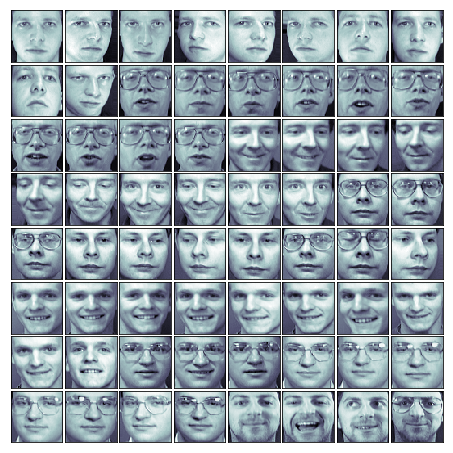

In [14]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest') 
plt.show()

In [15]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.

X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print X_proj.shape

(400, 64)


In [16]:

print np.cumsum(pca_oliv.explained_variance_ratio_)

[ 0.23812734  0.37806675  0.45775291  0.50773627  0.54383475  0.57540417
  0.5996725   0.62003648  0.63961762  0.65633887  0.6722911   0.68666089
  0.69912833  0.71059966  0.72122842  0.73100561  0.74019623  0.74835199
  0.75589073  0.76336056  0.77034634  0.7764926   0.78233188  0.78802913
  0.79349107  0.79880959  0.80394775  0.80890614  0.81348276  0.81789458
  0.82191449  0.82575631  0.82937562  0.83272094  0.83592439  0.83908457
  0.84213579  0.84512192  0.84794319  0.85068214  0.85327852  0.85581648
  0.85826075  0.86065757  0.86296207  0.86522382  0.86744219  0.86964017
  0.8717221   0.8737604   0.87572038  0.87762618  0.87946492  0.88123423
  0.88299626  0.8847065   0.8863833   0.88799518  0.88958216  0.8911286
  0.89265865  0.89413643  0.89560032  0.89702648]


In [21]:
print(pca_oliv.components_)
print(pca_oliv.components_.shape)

[[-0.0041911  -0.00710948 -0.00933607 ...,  0.00018514  0.00337964
   0.00318824]
 [-0.02859135 -0.0332884  -0.03784649 ...,  0.02962782  0.02721299
   0.02488899]
 [ 0.00135672 -0.00032566 -0.00019812 ..., -0.01541371 -0.01370984
  -0.01188346]
 ..., 
 [ 0.00202366 -0.00568274 -0.0196829  ...,  0.01040989  0.01764276
   0.01789242]
 [ 0.01194589  0.00297787 -0.00347042 ...,  0.02093806  0.01287968
   0.01011782]
 [ 0.00788788  0.01309892  0.02496099 ...,  0.01067602  0.02901746
   0.02347453]]
(64, 4096)


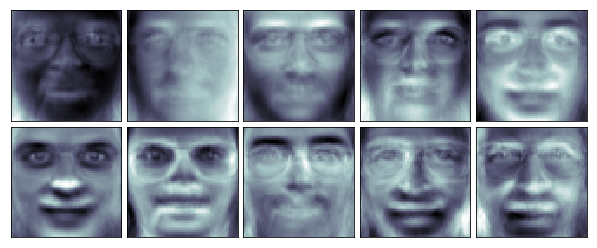

In [25]:
#This is great so far. Now we have a reduced 64 dimension dataset, generated with 64 principal components. 
#Each of these principal components can explain some variation in the original dataset. The parameter components_ of the 
#estimator object gives the components with maximum variance

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

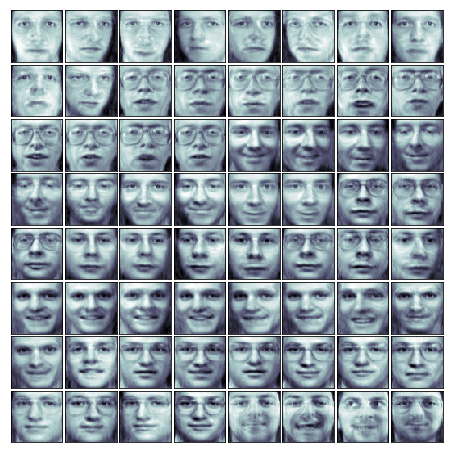

In [26]:
#Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 
#64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images 
#back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the 
#actual dimension of the original images so we can visualize them.

X_inv_proj = pca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')